<a href="https://colab.research.google.com/github/beinganiz/EDA_Data_Analysis/blob/main/uk_accident_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uk-Accident-EDA

Use the "Run" button to execute the code.

In [31]:
#Todo-Talk About EDA
#Todo-Talk About The Dataset(Source,What it Contain,How it will be useful)
#-kaggle
#-Information about accidents
#-Can be usefull to prevent accident

## InstalllIng Pip And Gathering Data From Kaggle

In [32]:
pip install opendatasets

In [33]:
import opendatasets  as od
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
url='https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales/code'
od.download(url)

Skipping, found downloaded files in "./2000-16-traffic-flow-england-scotland-wales" (use force=True to force download)


## Data Preparation And Cleaning


1.  load the file using pandas
2.  load at some information about hte file
3.  fix any missing or incorrect values










##Concating Data First

In [34]:
first=pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv')
second=pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv')
third=pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')

<ipython-input-34-4eacbb83abd5>:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  first=pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv')
<ipython-input-34-4eacbb83abd5>:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  third=pd.read_csv('2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')


In [35]:
fst= pd.concat([first,second])
df=pd.concat([fst,third])

In [36]:
len(df)

1504150

##Cleaning And Arranging Data

In [37]:
null=df.isnull().sum()
null=null[null!=0].sort_values(ascending=False)

In [38]:
# This Much Null Value is Present in These Columns
null

Junction_Detail                                1504150
Junction_Control                                602835
LSOA_of_Accident_Location                       108238
Did_Police_Officer_Attend_Scene_of_Accident       2922
Road_Surface_Conditions                           1958
Weather_Conditions                                 126
Time                                               117
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Pedestrian_Crossing-Physical_Facilities             34
Carriageway_Hazards                                 29
Pedestrian_Crossing-Human_Control                   17
Special_Conditions_at_Site                          15
dtype: int64

In [39]:
#You Wanna Work On Clean Data We Have To Do This We  have To  Drop Null Values
df.dropna(axis=1,inplace=True)

In [40]:
#After Dropping Null Value My Data is Clean Now And ready To Work On
df.isna().sum()

Accident_Index                0
Police_Force                  0
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
1st_Road_Class                0
1st_Road_Number               0
Road_Type                     0
Speed_limit                   0
2nd_Road_Class                0
2nd_Road_Number               0
Light_Conditions              0
Urban_or_Rural_Area           0
Year                          0
dtype: int64

#Data Visualization

In [41]:
df.columns

Index(['Accident_Index', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number', 'Light_Conditions',
       'Urban_or_Rural_Area', 'Year'],
      dtype='object')

#### Accident Happen in Each Year

In [42]:
year_wise_acc=df.groupby('Year')['Accident_Index'].count()

In [43]:
#getting Index And Values Seperate
yrs=year_wise_acc.index.tolist()
yrs_acc=year_wise_acc.tolist()

<Axes: >

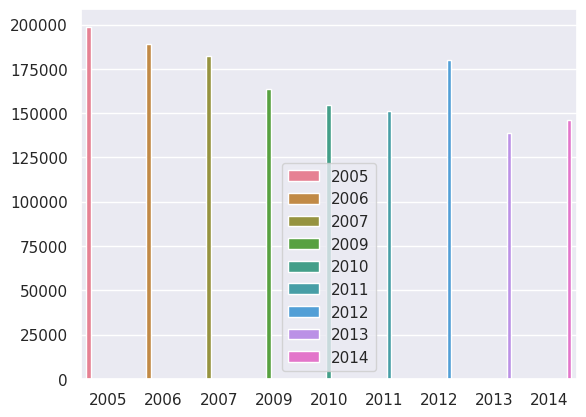

In [44]:
sea.barplot(y=yrs_acc,x=yrs,palette='husl',hue=yrs)

#### Speed While Accident by  Each Year

In [45]:
yrr_speed=df.groupby(['Speed_limit','Year'])['Accident_Index'].count()
speed=yrr_speed.index.tolist()
acc_speed=yrr_speed.tolist()
spd_yrr=[]
spd=[]
for d,a in speed:
  spd_yrr.append(a)
  spd.append(d)

<Axes: title={'center': 'Accident by Speed Each Year'}, xlabel='Speed', ylabel='Accident'>

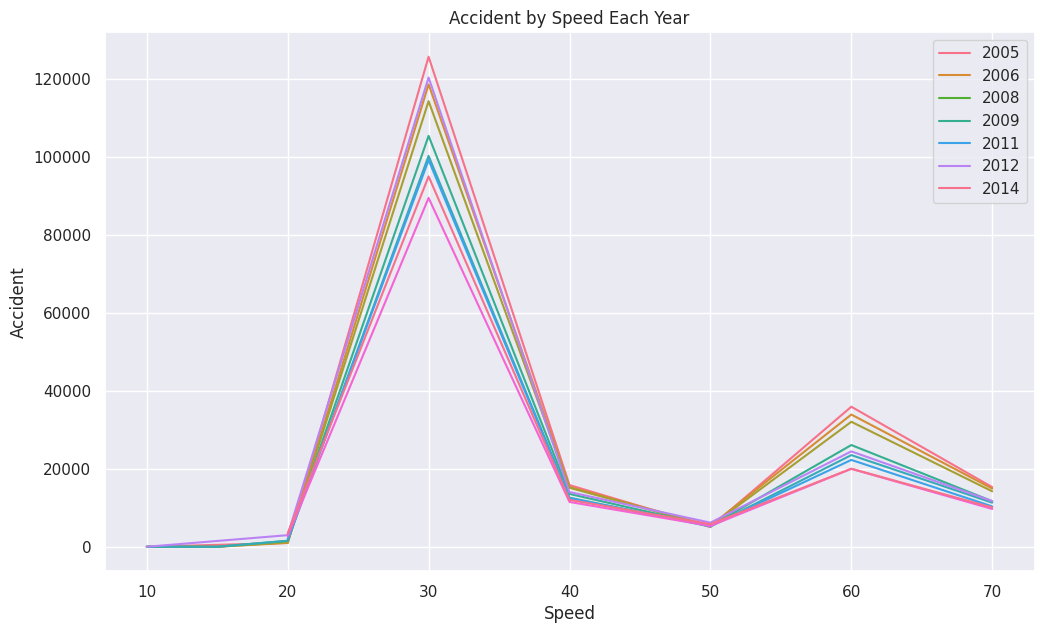

In [46]:
plt.figure(figsize=(12,7))
plt.xlabel("Speed")
plt.ylabel("Accident")
plt.title("Accident by Speed Each Year")
sea.lineplot(x=spd,y=acc_speed,hue=spd_yrr,palette='husl')

#### Month Wise Accident

In [47]:
df['Date']=pd.to_datetime(df['Date'])
month=df[df['Date'].dt.year==2007]

<ipython-input-47-13bc5bb2b998>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


<Axes: title={'center': 'Accident By Month in year 2010'}, xlabel='Month', ylabel='Accident'>

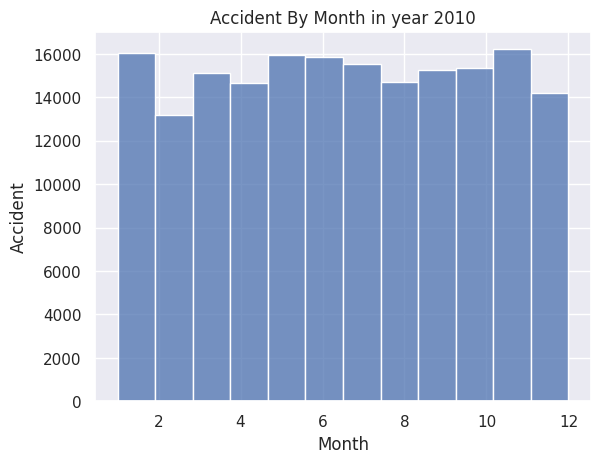

In [48]:
plt.xlabel('Month')
plt.ylabel('Accident')
plt.title('Accident By Month in year 2010')
sea.histplot(month.Date.dt.month,bins=12)

####Road Type While Accident

In [49]:
road_ty = df.groupby(['Year','Road_Type'])['Accident_Index'].count()
road=road_ty.index.tolist()
roads=[]
rod_yrr=[]
val=road_ty.tolist()
for d,a in road:
  roads.append(a)
  rod_yrr.append(d)

<Axes: >

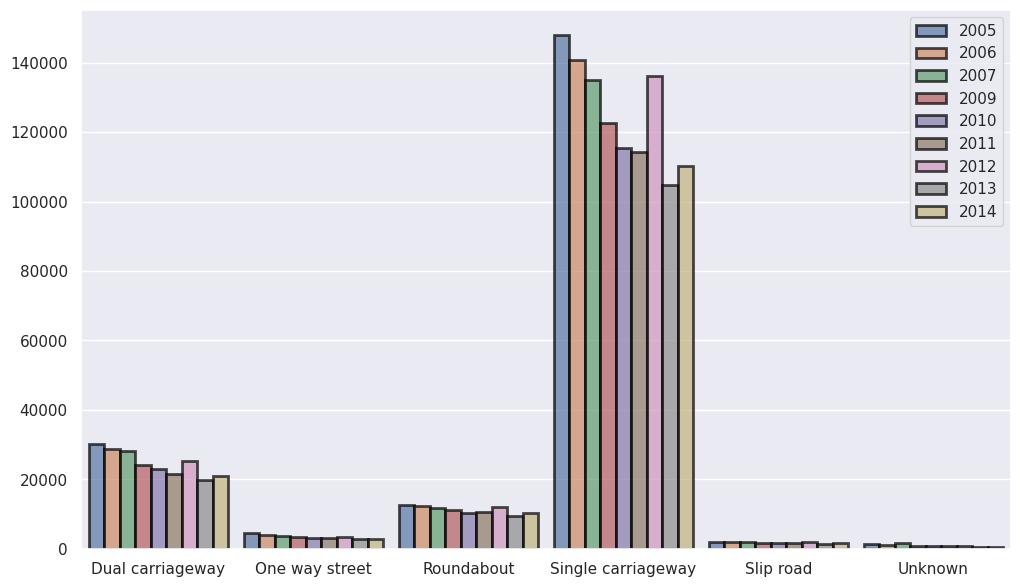

In [50]:
plt.figure(figsize=(12,7))
sea.barplot(x=roads, y=val, hue=rod_yrr, edgecolor='black', linewidth=2,width=0.9,alpha=0.7)

#### Accident Occurs In AREA

In [51]:
df.loc[df['Urban_or_Rural_Area'] == 1, 'Area'] = 'Urban'
df.loc[df['Urban_or_Rural_Area'] == 2, 'Area'] = 'Rural'
df.loc[df['Urban_or_Rural_Area'] == 1, 'Area'] = 'Urban_Or_Rural'

In [52]:
acc_area=df.groupby(['Area'],as_index=False)['Accident_Index'].count()

#### Accident Location by Year On plot

In [53]:
#If you are intrested in to take out Its up to You
#sample = df.sample(int(0.03 * len(df)))  ##this will help me t take out 20% of data from the datafrmes
# sample`


In [54]:
sea.set_theme(style='darkgrid')

In [55]:
data = pd.concat([first[['Longitude','Latitude']], second[['Longitude','Latitude']], third[['Longitude','Latitude']]])
df['Longitude']=data['Longitude']
df['Latitude']=data['Latitude']

In [56]:
df['Year']

0         2005
1         2005
2         2005
3         2005
4         2005
          ... 
464692    2014
464693    2014
464694    2014
464695    2014
464696    2014
Name: Year, Length: 1504150, dtype: int64

<Axes: xlabel='Longitude', ylabel='Latitude'>

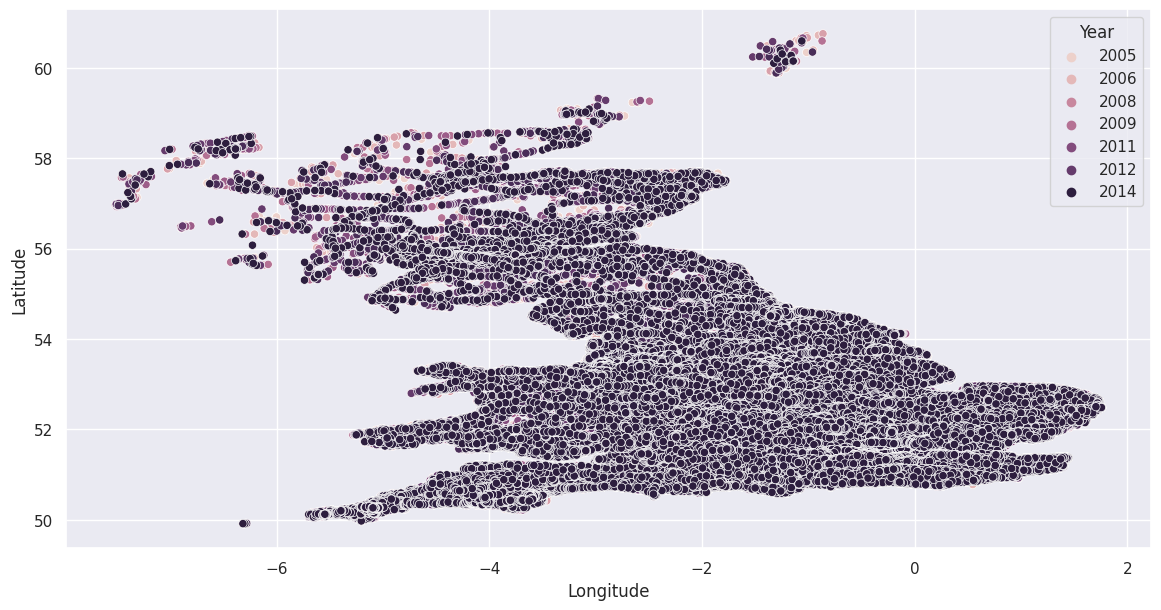

In [57]:
plt.figure(figsize=(14,7))
sea.scatterplot(x=df.Longitude,y=df.Latitude,hue=df.Year)

In [ ]:
pip install folium

In [59]:
import folium

In [62]:
lon=df.Longitude
lat=df.Latitude

cordinate=list((zip(list(lat),list(lon))))
# sample = df[['Longitude', 'Latitude']].sample(100)
# # Iterate through the sample
# for index, row in sample.iterrows():
#     marker = folium.Marker(location=(row['Latitude'], row['Longitude']))
#     marker.add_to(map)
# map

In [ ]:
from folium.plugins import HeatMap
map=folium.Map()
HeatMap(cordinate[:100]).add_to(map)
map

In [67]:
drop=df.dropna(subset=['Longitude','Latitude'],inplace=True)
lon=df.Longitude
lat=df.Latitude
cordinate=list((zip(list(lat),list(lon))))
from folium.plugins import HeatMap
map=folium.Map()
HeatMap(cordinate).add_to(map)
map

In [68]:
map

1)How has changing traffic flow impacted accidents?
2)Can we predict accident rates over time? 3)What might improve accident rates?
4)Plot interactive maps of changing trends, e.g. How has London has changed for cyclists? Busiest roads in the nation?
5)Which areas never change and why? Identify infrastructure needs, failings and successes.
6)How have Rural and Urban areas differed (see RoadCategory)? How about the differences between England, Scotland, and Wales?
7)The UK government also like to look at miles driven. You can do this by multiplying the AADF by the corresponding length of road (link length) and by the number of days in the years. What does this tell you about UK roads?

*   List item

---


*   List item

